In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.linspace(0, 2 * np.pi, 50)  # Training points
y = np.sin(X) + 0.2 * np.random.randn(len(X))  # Noisy sine wave
X_test = np.linspace(0, 2 * np.pi, 200)  # Test points for visualization


def rbf_kernel(x1, x2, gamma=0.1):
    return np.exp(-gamma * (x1 - x2)**2)

gamma = 0.1
K = np.zeros((len(X), len(X)))
for i in range(len(X)):
    for j in range(len(X)):
        K[i, j] = rbf_kernel(X[i], X[j], gamma)
        
lambda_val = 0.1
alpha = np.linalg.inv(K + lambda_val * np.eye(len(X))) @ y

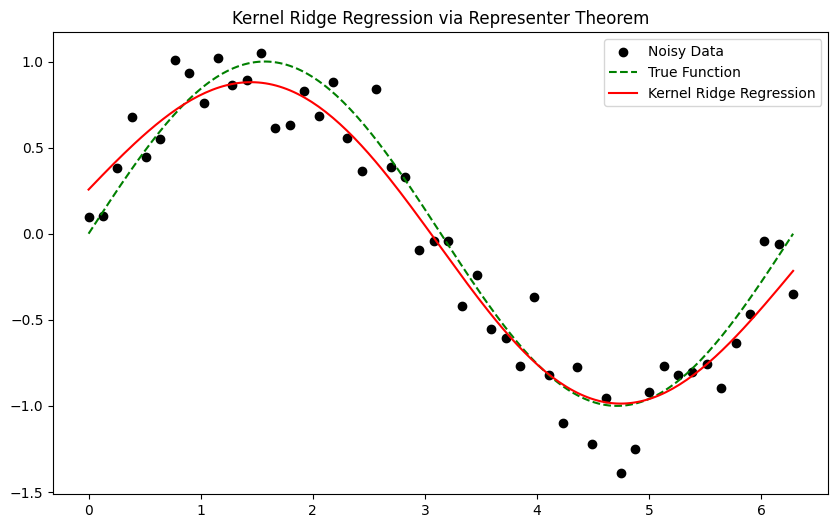

In [8]:
# Compute predictions using the Representer Theorem
K_test = np.array([[rbf_kernel(x, X[j], gamma) for j in range(len(X))] for x in X_test])
y_pred = K_test @ alpha

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Noisy Data')
plt.plot(X_test, np.sin(X_test), '--', label='True Function', color='green')
plt.plot(X_test, y_pred, label='Kernel Ridge Regression', color='red')
plt.title("Kernel Ridge Regression via Representer Theorem")
plt.legend()
plt.show()

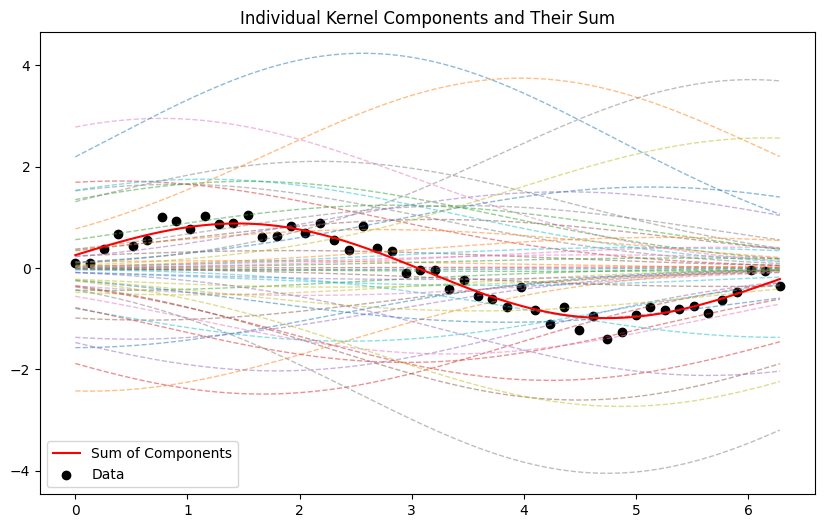

In [9]:
# Plot individual kernel components
plt.figure(figsize=(10, 6))
for i in range(len(X)):
    component = alpha[i] * np.array([rbf_kernel(x, X[i], gamma) for x in X_test])
    plt.plot(X_test, component, '--', alpha=0.5, linewidth=1)

plt.plot(X_test, y_pred, 'r-', label='Sum of Components')
plt.scatter(X, y, c='k', label='Data')
plt.title("Individual Kernel Components and Their Sum")
plt.legend()
plt.show()

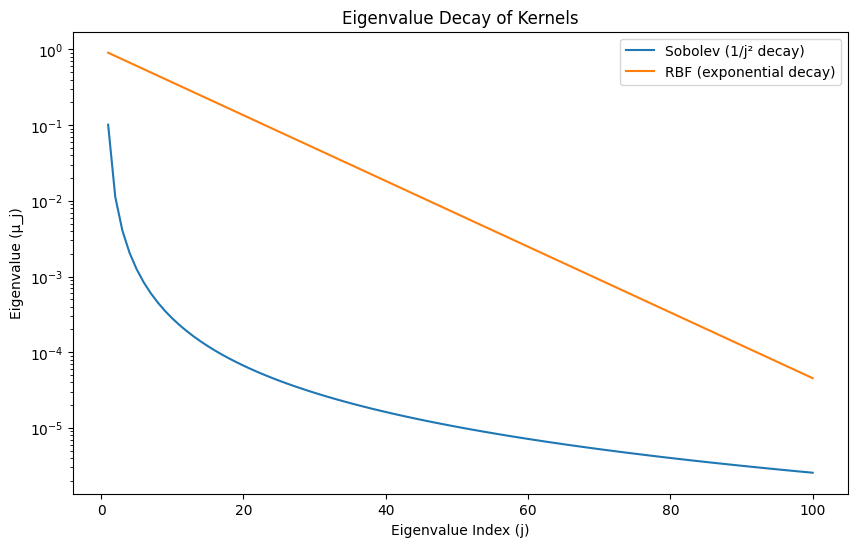

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Eigenvalues for different kernels
n = 100
x = np.arange(1, n+1)

# Sobolev (1/j^2 decay)
sobolev = 1 / (np.pi**2 * (2*x - 1)**2)

# RBF (exponential decay)
gamma = 0.1
rbf = np.exp(-gamma * x)

# Plot eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(x, sobolev, label='Sobolev (1/j² decay)')
plt.plot(x, rbf, label='RBF (exponential decay)')
plt.yscale('log')
plt.xlabel('Eigenvalue Index (j)')
plt.ylabel('Eigenvalue (µ_j)')
plt.title('Eigenvalue Decay of Kernels')
plt.legend()
plt.show()

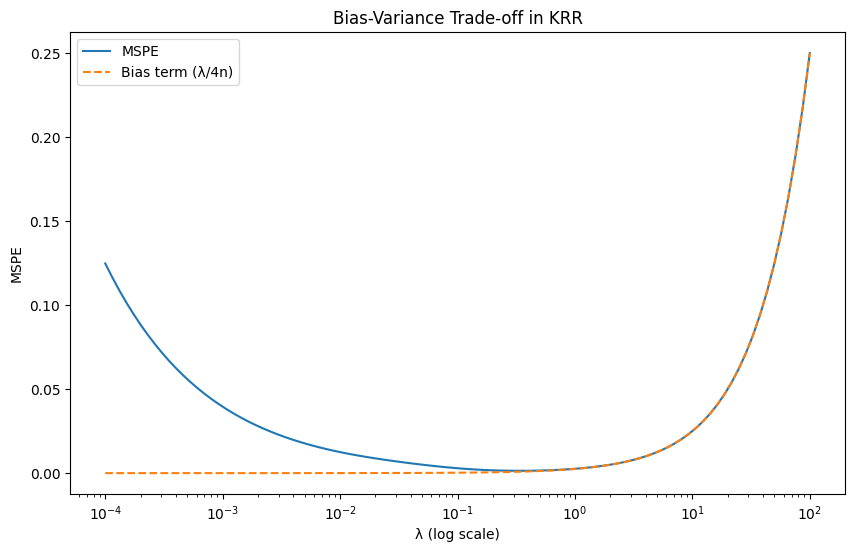

In [11]:
def MSPE(d, sigma_sq=1, lambda_vals=np.logspace(-4, 2, 100)):
    variance = sigma_sq * np.sum(d**2 / (d + lambda_vals.reshape(-1, 1))**2, axis=1) / len(d)
    bias = lambda_vals / (4 * len(d))
    return variance + bias

# Simulate eigenvalues (Sobolev-like decay)
d = 1 / (np.pi**2 * (2*np.arange(1, 101) - 1)**2)
lambda_vals = np.logspace(-4, 2, 100)
mspe = MSPE(d, sigma_sq=1, lambda_vals=lambda_vals)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(lambda_vals, mspe, label='MSPE')
plt.plot(lambda_vals, 1/(4*len(d)) * lambda_vals, '--', label='Bias term (λ/4n)')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('MSPE')
plt.title('Bias-Variance Trade-off in KRR')
plt.legend()
plt.show()

w = [-0.26372378 -0.78342282] 
b = -2.8761065097253518


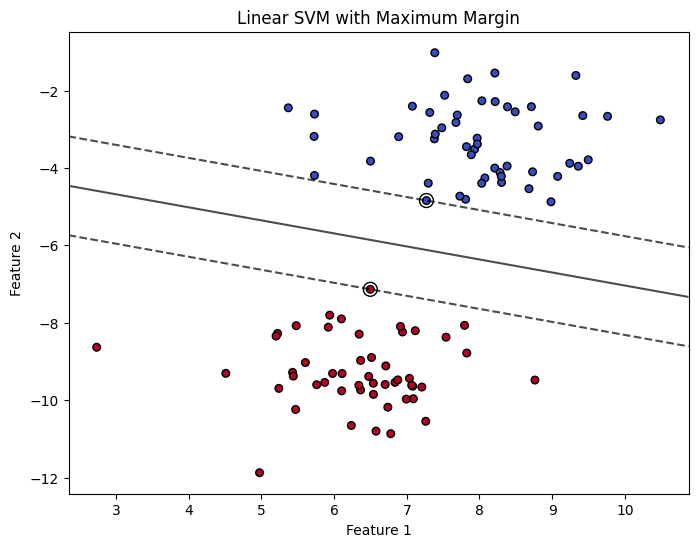

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Generate synthetic 2D data (two classes)
np.random.seed(42)
# Create two blobs of points
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)
# Convert labels from {0,1} to {-1,1}
y = 2*y - 1

# Fit a linear SVM classifier with a hard-margin (or soft-margin if data are not separable)
clf = svm.SVC(kernel='linear', C=1e5)  # C large => almost hard margin
clf.fit(X, y)

# Extract the separating hyperplane parameters
w = clf.coef_[0]
b = clf.intercept_[0]
print("w =", w, "\nb =", b)

# Plot the decision boundary and margin
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

# Create a grid to evaluate model
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
           linestyles=['--', '-', '--'])
# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title("Linear SVM with Maximum Margin")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


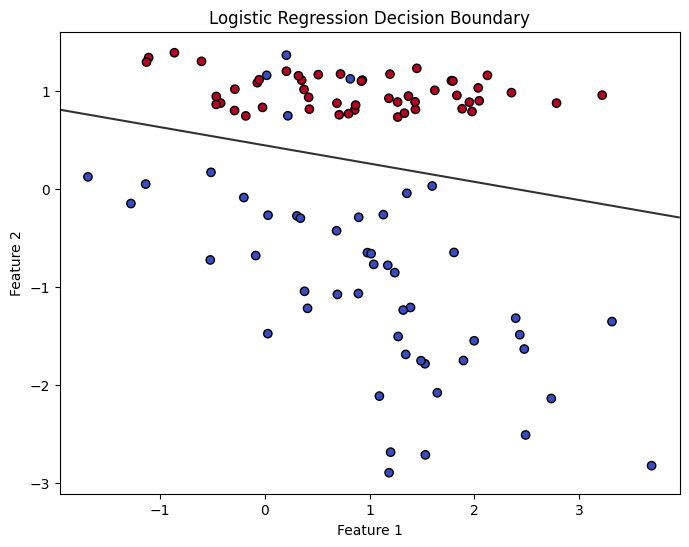

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# Generate a simple 2D dataset for logistic regression
np.random.seed(0)
X, y = datasets.make_classification(n_samples=100, n_features=2, n_redundant=0,
                                     n_informative=2, n_clusters_per_class=1)
# Convert labels from {0,1} to {-1,1} if desired (though scikit-learn uses {0,1})
y_lr = y  # for scikit-learn logistic regression, we keep {0,1}

# Fit logistic regression
lr = LogisticRegression()
lr.fit(X, y_lr)

# Plot the decision boundary.
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_lr, cmap=plt.cm.coolwarm, edgecolors='k')

# Create grid to evaluate model
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = lr.predict_proba(xy)[:, 1].reshape(XX.shape)

# Plot decision boundary where probability = 0.5
ax.contour(XX, YY, Z, levels=[0.5], cmap="Greys", vmin=0, vmax=0.6)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


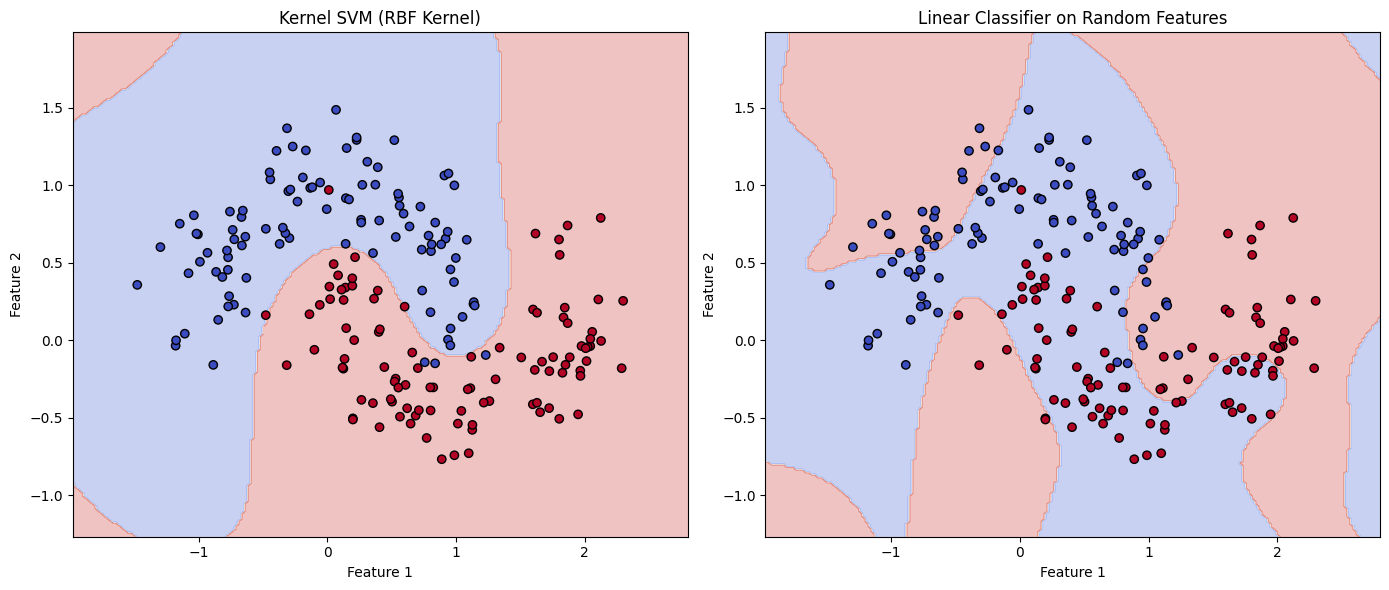

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics.pairwise import rbf_kernel
from sklearn import datasets

def random_features(X, D, sigma):
    """
    Map input data X (n_samples x d) to random features of dimension D.
    For Gaussian kernel approximation.
    
    Parameters:
        X: (n_samples, d)
        D: number of random features
        sigma: kernel width parameter (standard deviation)
    
    Returns:
        Z: (n_samples, D) random feature matrix
    """
    n, d = X.shape
    # Draw D random vectors from N(0, 1/sigma^2 * I)
    W = np.random.normal(loc=0, scale=1.0/sigma, size=(d, D))
    # Draw D random phases uniformly from [-pi, pi]
    u = np.random.uniform(low=-np.pi, high=np.pi, size=D)
    # Compute random features: each feature is sqrt(2/D)*cos(W^T x + u)
    Z = np.sqrt(2.0/D) * np.cos(X.dot(W) + u)
    return Z

# Generate a non-linear 2D dataset (make two interleaving half circles)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
# Convert labels to {-1,1} for visualization consistency if desired
y = 2*y - 1

# Parameters for random features
D = 500      # number of random features
sigma = 0.5  # kernel width

# Compute random feature mapping
Z = random_features(X, D, sigma)

# Fit a linear classifier on the random features.
# Here we use ridge classification for simplicity.
clf_rf = RidgeClassifier(alpha=1.0)
clf_rf.fit(Z, y)

# For comparison, fit a kernel SVM using the full RBF kernel
from sklearn.svm import SVC
clf_kernel = SVC(kernel='rbf', gamma=1/(2*sigma**2), C=1.0)
clf_kernel.fit(X, y)

# Plot decision boundaries for both methods
def plot_decision_boundary(clf, feature_map=None, title="Decision Boundary"):
    # Create a grid over feature space
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    if feature_map is not None:
        # Map the grid points using the random feature mapping
        grid_mapped = random_features(grid, D, sigma)
        Z_pred = clf.predict(grid_mapped)
    else:
        Z_pred = clf.predict(grid)
        
    Z_pred = Z_pred.reshape(xx.shape)
    plt.contourf(xx, yy, Z_pred, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plot_decision_boundary(clf_kernel, title="Kernel SVM (RBF Kernel)")

plt.subplot(1, 2, 2)
plot_decision_boundary(clf_rf, feature_map=True, title="Linear Classifier on Random Features")

plt.tight_layout()
plt.show()
